<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html codeexamplesscaling.do.txt  -->
<!-- dom:TITLE: Scaling examples with own code and the library Scikit-Learn -->

# Scaling examples with own code and the library Scikit-Learn
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **Sep 11, 2023**

Copyright 1999-2023, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## This note contains code examples with a simple scaling

The programs here use both ordinrary least squares (OLS) and Ridge
regression with one value only for the hyperparameter $\lambda$. The
first example has no scaling and includes the intercept as well and we
are trying to fit a second-order polynomial. The second code takes out
the intercept and subtracts the mean values of each column of the
design matrix and the mean value of the outputs.

The third and final code uses **Scikit-Learn** as library in order to
calculate the optimal parameters for OLS and Ridge regression. Note
that it is highly recommended to not include the intercept in Ridge
and Lasso regression, in order to avoid penalizing the optimization by
the intercept. The second and third codes do thus not include the
intercept. In the second code we do the scaling ourselves while the
last code uses the standard scaler option included in **Scikit-Learn**, known as centering (where
we subtract the mean values).

[1.79934087 0.47179152 5.01549939]
[1.79909592 0.47176716 5.01550546]
  
test MSE of OLS:
1.13943111290393
  
test MSE of Ridge
1.1395235273363686


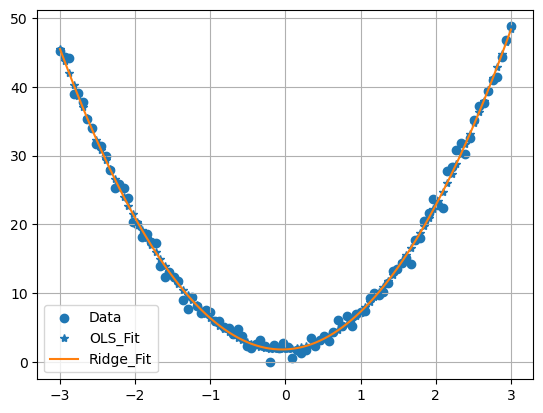

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def OLS_fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def Ridge_fit_beta(X, y,L,d):
    I = np.eye(d,d)
    return np.linalg.pinv(X.T @ X + L*I) @ X.T @ y

# Same random numbers for each test.
np.random.seed(2018)
n = 100
d = 3
# hyperparameter lambda
Lambda = 0.01

# Make data set, simple second-order polynomial
x = np.linspace(-3, 3, n)
y = 2.0 + 0.5*x + 5.0*(x**2)+ np.random.randn(n)

# The design matrix X includes the intercept and no scaling is made
X = np.zeros((len(x), d))
for p in range(d):     
    X[:, p] = x ** (p) 


#Split data, no scaling is used and we include the intercept
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Calculate beta, own code
beta_OLS = OLS_fit_beta(X_train, y_train)
beta_Ridge = Ridge_fit_beta(X_train, y_train,Lambda,d)
print(beta_OLS)
print(beta_Ridge)
#predict value
ytilde_test_OLS = X_test @ beta_OLS
ytilde_test_Ridge = X_test @ beta_Ridge

#Calculate MSE
print("  ")
print("test MSE of OLS:")
print(MSE(y_test,ytilde_test_OLS))
print("  ")
print("test MSE of Ridge")
print(MSE(y_test,ytilde_test_Ridge))

plt.scatter(x,y,label='Data')
plt.plot(x, X @ beta_OLS,'*', label="OLS_Fit")
plt.plot(x, X @ beta_Ridge, label="Ridge_Fit")
plt.grid()
plt.legend()
plt.show()

In this example we do not include the intercept and we scale the data by subtracting the mean values. This follows the discussion in the [lecture material](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#more-on-rescaling-data).
see also the weekly slides [for week 36](https://compphysics.github.io/MachineLearning/doc/pub/week36/html/._week36-bs029.html).
It is recommended whrn we use Ridge and Lasso regression to not include the intercept in the optimization process.

Before we discuss the code, we repeat some of the basic math from the slides of week 36.

Let us try to understand what this may imply mathematically when we
subtract the mean values, also known as *zero centering* or simply *centering*. For
simplicity, we will focus on  ordinary regression, as done in the above example.

The cost/loss function  for regression is

$$
C(\beta_0, \beta_1, ... , \beta_{p-1}) = \frac{1}{n}\sum_{i=0}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij}\beta_j\right)^2,.
$$

Recall also that we use the squared value. This expression can lead to an
increased penalty for higher differences between predicted and
output/target values.

What we have done is to single out the $\beta_0$ term in the
definition of the mean squared error (MSE).  The design matrix $X$
does in this case not contain any intercept column.  When we take the
derivative with respect to $\beta_0$, we want the derivative to obey

$$
\frac{\partial C}{\partial \beta_j} = 0,
$$

for all $j$. For $\beta_0$ we have

$$
\frac{\partial C}{\partial \beta_0} = -\frac{2}{n}\sum_{i=0}^{n-1} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij} \beta_j\right).
$$

Multiplying away the constant $2/n$, we obtain

$$
\sum_{i=0}^{n-1} \beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} \sum_{j=1}^{p-1} X_{ij} \beta_j.
$$

Let us specialize first to the case where we have only two parameters $\beta_0$ and $\beta_1$.
Our result for $\beta_0$ simplifies then to

$$
n\beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} X_{i1} \beta_1.
$$

We obtain then

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \beta_1\frac{1}{n}\sum_{i=0}^{n-1} X_{i1}.
$$

If we define

$$
\mu_{\boldsymbol{x}_1}=\frac{1}{n}\sum_{i=0}^{n-1} X_{i1},
$$

and the mean value of the outputs as

$$
\mu_y=\frac{1}{n}\sum_{i=0}^{n-1}y_i,
$$

we have

$$
\beta_0 = \mu_y - \beta_1\mu_{\boldsymbol{x}_1}.
$$

In the general case with more parameters than $\beta_0$ and $\beta_1$, we have

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \frac{1}{n}\sum_{i=0}^{n-1}\sum_{j=1}^{p-1} X_{ij}\beta_j.
$$

We can rewrite the latter equation as

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \sum_{j=1}^{p-1} \mu_{\boldsymbol{x}_j}\beta_j,
$$

where we have defined

$$
\mu_{\boldsymbol{x}_j}=\frac{1}{n}\sum_{i=0}^{n-1} X_{ij},
$$

the mean value for all elements of the column vector $\boldsymbol{x}_j$.

Replacing $y_i$ with $y_i - y_i - \overline{\boldsymbol{y}}$ and centering also our design matrix results in a cost function (in vector-matrix disguise)

$$
C(\boldsymbol{\beta}) = (\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta})^T(\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta}).
$$

If we minimize with respect to $\boldsymbol{\beta}$ we have then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\boldsymbol{\tilde{y}},
$$

where $\boldsymbol{\tilde{y}} = \boldsymbol{y} - \overline{\boldsymbol{y}}$
and $\tilde{X}_{ij} = X_{ij} - \frac{1}{n}\sum_{k=0}^{n-1}X_{kj}$.

For Ridge regression we need to add $\lambda \boldsymbol{\beta}^T\boldsymbol{\beta}$ to the cost function and get then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X} + \lambda I)^{-1}\tilde{X}^T\boldsymbol{\tilde{y}}.
$$

Now we try to implement this.

In [40]:
np.random.seed(2018)
n = 100
d = 2
Lambda = 0.01
# Make data set.
x = np.linspace(-3, 3, n)
y = 2.0 + 0.5*x + 5.0*(x**2)+ np.random.randn(n)

#Design matrix X does not include the intercept. 
X = np.zeros((len(x), d))
for p in range(d):     
    X[:, p] = x ** (p+1)

#Split data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale data by subtracting mean value,own implementation
#For our own implementation, we will need to deal with the intercept by centering the design matrix and the target variable
X_train_mean = np.mean(X_train,axis=0)
#Center by removing mean from each feature
X_train_scaled = X_train - X_train_mean
X_test_scaled = X_test - X_train_mean
#The model intercept (called y_scaler) is given by the mean of the target variable (IF X is centered, note)
y_scaler = np.mean(y_train)
y_train_scaled = y_train - y_scaler


#Calculate beta
beta_OLS = OLS_fit_beta(X_train_scaled, y_train_scaled)
Ridge_fit_beta(X_train_scaled, y_train_scaled,Lambda,d)
print(beta_OLS)
print(beta_Ridge)
# calculate intercepts and print them
interceptOLS = y_scaler - X_train_mean @ beta_OLS
interceptRidge = y_scaler - X_train_mean @ beta_Ridge
print(interceptOLS)
print(interceptRidge)

#predict value with intercept
ytilde_test_OLS = X_test_scaled @ beta_OLS+y_scaler
ytilde_test_Ridge = X_test_scaled @ beta_Ridge+y_scaler
#Calculate MSE

print("  ")
print("test MSE of OLS:")
print(MSE(y_test,ytilde_test_OLS))
print("  ")
print("test MSE of Ridge")
print(MSE(y_test,ytilde_test_Ridge))


plt.scatter(x,y,label='Data')
plt.plot(x, X @ beta_OLS+interceptOLS,'*', label="OLS_Fit")
plt.plot(x, X @ beta_Ridge+interceptRidge, label="Ridge_Fit")
plt.grid()
plt.legend()
plt.show()

[0.47179152 5.01549939]
[1.79909592 0.47176716 5.01550546]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

Finally, instead of using our own function we repeat the same example
using the **standardscaler** functionality of the library
**Scikit-Learn**.  Here we limit ourselves to Ridge regression only.

  
test MSE of OLS
1.1394311129039263
  
test MSE of Ridge
96.31278139904835


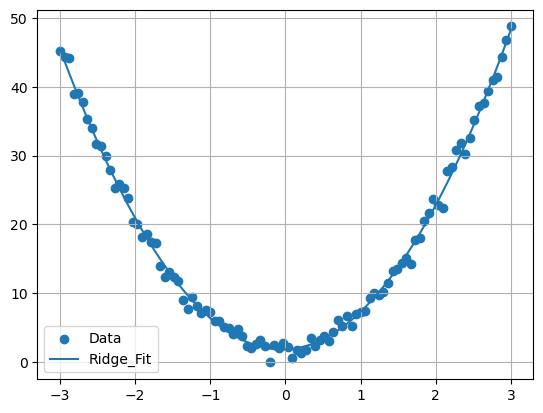

In [41]:
X_test @ RegRidge.coef_+ RegRidge.intercept_
ytilde_test_OLS = X_test @ OLS.coef_+ OLS.intercept_

#Calculate MSE
print("  ")
print("test MSE of OLS")
print(MSE(y_test,ytilde_test_OLS))
print("  ")
print("test MSE of Ridge")
print(MSE(y_test,ytilde_test_Ridge))
plt.scatter(x,y,label='Data')
plt.plot(x, X @ RegRidge.coef_ + RegRidge.intercept_ , label="Ridge_Fit")
plt.grid()
plt.legend()
plt.show()